## Goal

The goal is to build a convolutional neural network class. For this, I break down each component of a CNN before building the complete network on CIFAR-10 dataset that contains 10 classes of images. 

Let us first import the libraries we are going to use. TensorFlow for DL models, matplotlib for plotting data/results, numpy and pandas for data handling. 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
print("TF version:", tf.__version__)

import matplotlib.pyplot as plt   
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

TF version: 2.9.2


## Loading Data

### CIFAR-10


[The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:
<table>
    <tr>
        <td class="cifar-class-name">airplane</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">automobile</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">bird</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">cat</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">deer</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">dog</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">frog</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">horse</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">ship</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">truck</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck10.png" class="cifar-sample" /></td>
    </tr>
</table>									


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
s_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

#Normalizing pixel values to [0,1]

In [ ]:
#Normalize pixel values to [0,1]
x_train, x_test = x_train/255,x_test/255
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

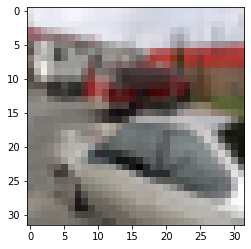

In [ ]:
plt.imshow(x_train[49999])

In [ ]:
def show_img(x, title="", bot=""):
    plt.imshow(x)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(bot)

In [ ]:

print(np.unique(y_train))
s_labels

[0 1 2 3 4 5 6 7 8 9]


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

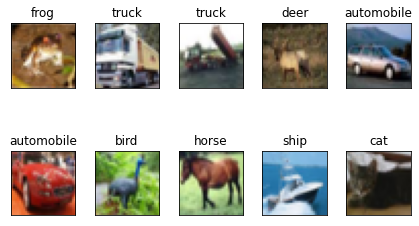

In [ ]:
for i in range(10):
  plt.subplot(2,5,i+1)
  show_img(x_train[i],title=s_labels[y_train[i][0]])
plt.tight_layout()





Here the values being assigned are the dimensions of x_train in the order batch_size, height, width, and channels.

In [ ]:
batch_size, height, width, channels = x_train.shape

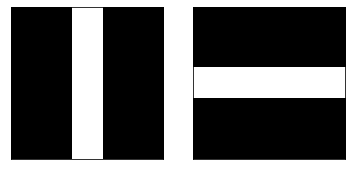

In [ ]:
filters = np.zeros(shape=(5,5,channels,2))
filters[:, 2, :, 0] = 1
filters[2, :, :, 1] = 1

plt.subplot(1,2,1)
show_img(filters[:, :, :, 0])
plt.subplot(1,2,2)
show_img(filters[:, :, :, 1])

Computing a 2-D convolution (`tf.nn.conv2d`) with the input argument x train(no of samples as 10) while maintaining the filters as filters, strides as "1", and padding as "SAME".

In [ ]:
out = tf.nn.conv2d(
    input=x_train[:10],
    filters=filters,
    strides=1,
    padding="SAME",
   
)

In [ ]:
out.shape

TensorShape([10, 32, 32, 2])

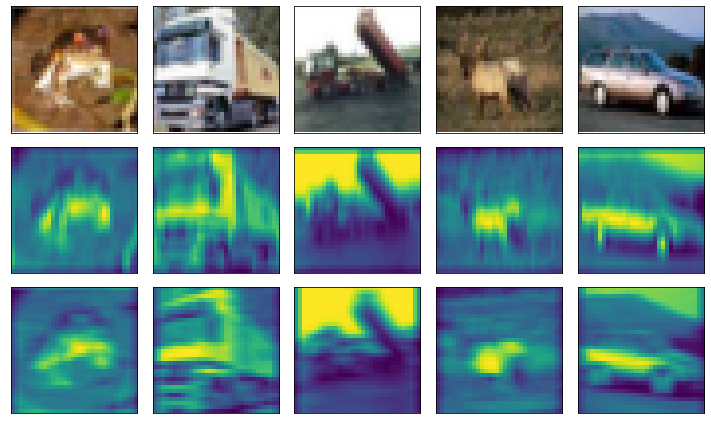

In [ ]:
plt.figure(figsize=(10,6))
for i in range(5):
    plt.subplot(3, 5, i+1)
    show_img(x_train[i])
    
    plt.subplot(3, 5, i+6)
    show_img(out[i, :, :, 0])
    
    plt.subplot(3, 5, i+11)
    show_img(out[i, :, :, 1])
    
plt.tight_layout()    

In [ ]:
def show_out(x, n_imgs=2):
    plt.figure(figsize=(10,8) if n_imgs==2 else (10,6))
    for i in range(n_imgs):
      plt.subplot(1,n_imgs,i+1)
      show_img(x[0, :, :, i])
      


    
    

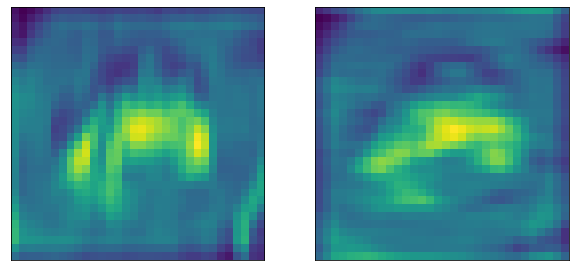

In [ ]:
show_out(out)

In [ ]:

out.shape


TensorShape([10, 32, 32, 2])

## Padding


In [ ]:
out1 = tf.nn.conv2d(
    input=x_train[:10],
    filters=filters,
    strides=1,
    padding="VALID",
   
)

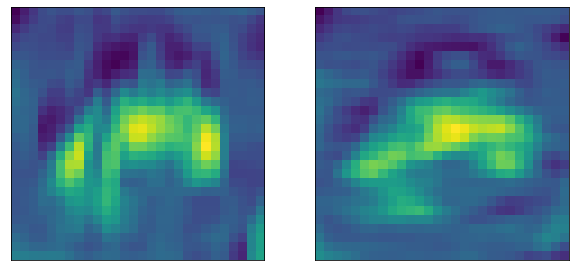

In [ ]:

show_out(out1)

In [ ]:

out1.shape

TensorShape([10, 28, 28, 2])

## Stride
Stride is the number of pixels shifts over the input matrix.

In [ ]:

out2 = tf.nn.conv2d(
    input=x_train[:10],
    filters=filters,
    strides=2,
    padding="SAME",
   
)



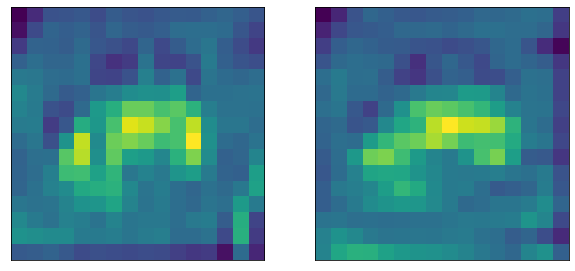

In [ ]:
show_out(out2)

In [ ]:

out3 = tf.nn.conv2d(
    input=x_train[:10],
    filters=filters,
    strides=3,
    padding="SAME",
   
)




TensorShape([10, 11, 11, 2])

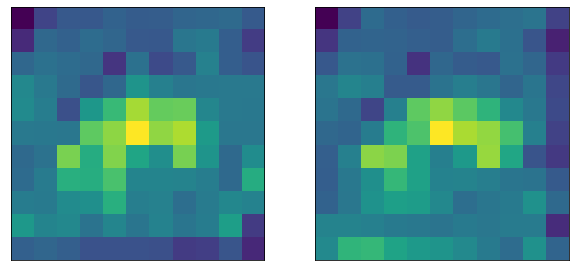

In [ ]:
show_out(out3)
out3.shape

## Pooling


In [ ]:
max_pool = keras.layers.MaxPool2D(pool_size=2)
out4=max_pool(x_train[:10])




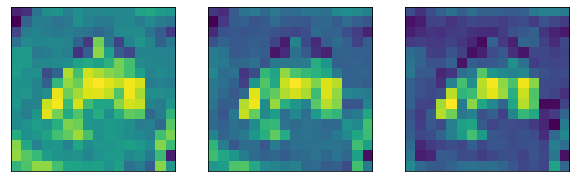

In [ ]:
show_out(out4,3)

To compare the max pooling images with the input images we can plot the original images as below. 

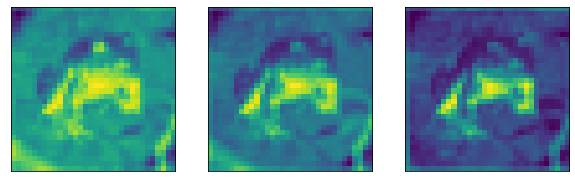

In [ ]:
show_out(x_train,3)

## Convolutaional Neural Networks

Now we are building a class for CNN model.

1. Following the image to build the CNN architecture

![](https://webpages.uncc.edu/mlee173/teach/ml/images/class/dsba6165-lab5-conv.png)

In [ ]:
class CNN(keras.Model):
    """ Convolutional Neural Networks
    
        attributes
        ===========
        net     Sequential
                network built with keras.Sequential
    """
    
    def __init__(self):
        super().__init__()
        
        
        self.net = tf.keras.Sequential()
        self.net.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
        self.net.add(keras.layers.MaxPool2D(2,2))
        self.net.add(layers.Conv2D(64,(3,3),activation='relu'))
        self.net.add(keras.layers.MaxPool2D(2,2))
        self.net.add(layers.Conv2D(64,(3,3),activation='relu'))
        self.net.add(tf.keras.layers.Flatten())
        self.net.add(tf.keras.layers.Dense(64,activation='relu'))
        self.net.add(tf.keras.layers.Dense(10))

        
        self.net.summary()
        
            
    def call(self, input):
        x = self.net(input)
        return x


In [ ]:

model = CNN()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

"Adam" as an `optimizer`, have a `loss` function to be "SparseCategoricalCrossentropy" taking argument as(from_logits=True) and `metrics` as "accuracy".

In [ ]:

model.compile(tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [ ]:

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))




Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.5200 - accuracy: 0.4475 - val_loss: 1.2311 - val_accuracy: 0.5498
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1509 - accuracy: 0.5904 - val_loss: 1.1035 - val_accuracy: 0.6075
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0127 - accuracy: 0.6449 - val_loss: 0.9957 - val_accuracy: 0.6526
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9162 - accuracy: 0.6792 - val_loss: 0.9467 - val_accuracy: 0.6722
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8443 - accuracy: 0.7070 - val_loss: 0.9269 - val_accuracy: 0.6807
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7838 - accuracy: 0.7277 - val_loss: 0.8925 - val_accuracy: 0.6885
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7361 - accuracy: 0.7424 - val_loss: 0.8863 - val_accuracy


We have Created `plot_learning` function that plots the training and validation loss learning curve using the `history` argument. 

In [ ]:
def plot_learning(history, tgt='loss', val_tgt='val_loss', ylab='error'):
    plt.plot(history.history[tgt], label=tgt)
    plt.plot(history.history[val_tgt], label=val_tgt)
    plt.xlabel('Epoch')
    plt.ylabel(ylab)
    plt.legend()

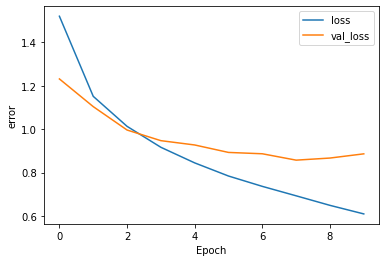

In [ ]:
plot_learning(history)


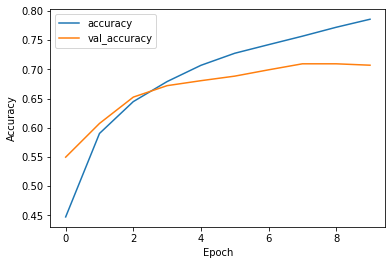

In [ ]:
plot_learning(history,tgt='accuracy', val_tgt='val_accuracy', ylab='Accuracy')


In [ ]:

model.evaluate(x_test,  y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.8860 - accuracy: 0.7072


[0.8859959840774536, 0.7071999907493591]

In many cases, where the size of the array is too large, it takes too much time to find the maximum elements from them. For this purpose, the numpy module of Python provides a function called `numpy.argmax()`. This function returns indices of the maximum values are returned along with the specified axis.


In [ ]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred

array([3, 8, 8, ..., 5, 4, 7])

In [ ]:
for i in range(10):
  plt.subplot(2,5,i+1)
  show_img(x_train[i],title=s_labels[y_train[i][0]])
plt.tight_layout()


'ship'

In [ ]:
y_pred

array([3, 8, 8, ..., 5, 4, 7])

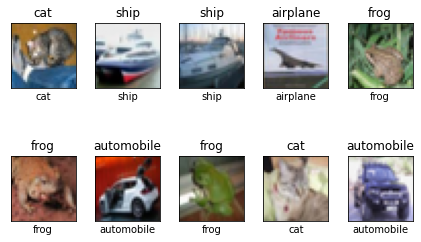

In [ ]:
#Bottom is for prediction, title is for actual labels
for i in range(10):
  plt.subplot(2,5,i+1)
  show_img(x_test[i],title=s_labels[y_test[i][0]],bot=s_labels[y_pred[i]])
plt.tight_layout()





